<a href="https://colab.research.google.com/github/lamiaehana/bertelsmann-technology-scholarship-program/blob/master/Neural_networks_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from torch import nn #what's the difference between torch and pytorch
import torch
import helper #what is this biblio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from torchvision import datasets, transforms # what that means and why we import transforms

#Define a transform to normalize the data
#why we start with this line?
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),])

#Download and load the training data
# is it always like that when we want to download the data?
trainset = datasets.MNIST('~/ .pytorch/MNIST_data/',download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle = True)

0it [00:00, ?it/s]

9920512it [00:02, 3938207.49it/s]                             


Extracting /root/ .pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/ .pytorch/MNIST_data/MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 58531.06it/s]                           
0it [00:00, ?it/s]

Extracting /root/ .pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/ .pytorch/MNIST_data/MNIST/raw


1654784it [00:01, 963912.47it/s]                             
0it [00:00, ?it/s]

Extracting /root/ .pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/ .pytorch/MNIST_data/MNIST/raw


8192it [00:00, 22040.86it/s]            

Extracting /root/ .pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/ .pytorch/MNIST_data/MNIST/raw
Processing...
Done!


In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


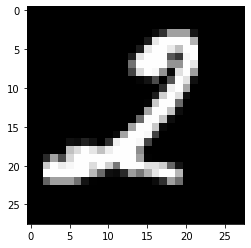

In [12]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(x):
  return 1/(1+torch.exp(-x))

#Flatten the input images
inputs = images.view(images.shape[0], -1)

#Create parameters
w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256,10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1)+b1)

out = torch.mm(h,w2)+b2

In [16]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities = softmax(out)

#Does it have the right shape? Should be (64,10)
print(probabilities.shape)

#Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    #inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784,256)
    #Output Layer, 10 units -one for each digit
    self.output = nn.Linear(256,10)

    #Define sigmoid and Softmax output
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    #Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x= self.softmax(x)

    return x

In [18]:
#Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __inint__():
  #Inputs to hidden Layer Linear transformation
    self.hidden = nn.Linear(784,256)
  #Output Layer, 10 units -one for each digit
    self.output = nn.Linear(256,10)

  def forward(self, x):
    #Hidden Layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    #Output Layer with softmax activation
    x = F.softmax(self.output(x), dim = 1)

    return x
